### 시계열 데이터 특성
- Trend = (upward, Horizontal/Stationary, downward)
- Seasonality = 반복되는 트렌드
- Cyclical = 일정하지 않은 기간의 트렌드 

### ETS Decomposition
- Trend, Seasonality, Cyclical, Residual 요소들을 분할

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

In [5]:
# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [8]:
airline = pd.read_excel("airport_demand_jeju.xls", thousands=',')

In [4]:
airline

,제주
200103,669146
200104,846679
200105,890046
200106,668967
200107,799255
200108,1072459
200109,659826
200110,779103
200111,786897
200112,748821


In [9]:
airline['index'] = airline.index

In [10]:
airline['index'] = airline['index'].apply(lambda x: str(x*100+1))

In [11]:
airline['index'] = airline['index'].apply(lambda x: pd.to_datetime(x[:4] + '-'+ x[4:6] + '-' + x[6:]))

In [12]:
airline.set_index('index', inplace=True)
airline.head()

,제주
index,
2001-03-01,669146
2001-04-01,846679
2001-05-01,890046
2001-06-01,668967
2001-07-01,799255


### Simple Moving Average

In [13]:
# MA12 model
airline['12month-SMA'] =\
airline['제주'].rolling(window=12).mean()

In [14]:
# MA6 model
airline['6month-SMA'] =\
airline['제주'].rolling(window=6).mean()

In [15]:
# MA4 model
airline['4month-SMA'] =\
airline['제주'].rolling(window=4).mean()

In [16]:
# MA2 model
airline['2month-SMA'] =\
airline['제주'].rolling(window=2).mean()

In [17]:
airline

,제주,12month-SMA,6month-SMA,4month-SMA,2month-SMA
index,,,,,
2001-03-01,669146,NaN,NaN,NaN,NaN
2001-04-01,846679,NaN,NaN,NaN,757912.5
2001-05-01,890046,NaN,NaN,NaN,868362.5
2001-06-01,668967,NaN,NaN,768709.50,779506.5
2001-07-01,799255,NaN,NaN,801236.75,734111.0
2001-08-01,1072459,NaN,8.244253e+05,857681.75,935857.0
2001-09-01,659826,NaN,8.228720e+05,800126.75,866142.5
2001-10-01,779103,NaN,8.116093e+05,827660.75,719464.5
2001-11-01,786897,NaN,7.944178e+05,824571.25,783000.0


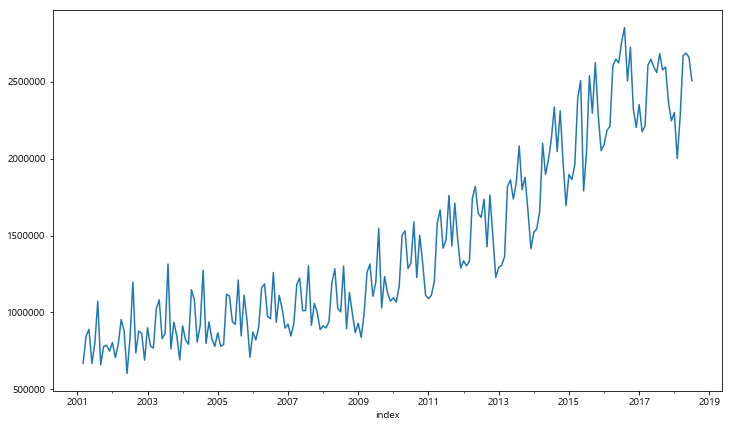

In [18]:
# 원래 데이터
airline['제주'].plot(figsize=(12,7))

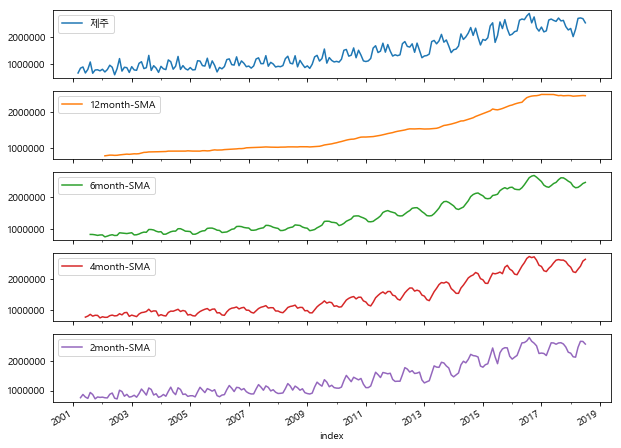

In [19]:
# 이동평균 비교
airline.plot(subplots=True, figsize=(10, 8));

In [20]:
airline.ix[-5:,[0,1,2,3,4]]

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,제주,12month-SMA,6month-SMA,4month-SMA,2month-SMA
index,,,,,
2018-03-01,2272555,2.453388e+06,2.296463e+06,2204396.25,2136819.5
2018-04-01,2668004,2.458447e+06,2.308651e+06,2310178.00,2470279.5
2018-05-01,2684804,2.461810e+06,2.361732e+06,2406611.75,2676404.0
2018-06-01,2658573,2.467173e+06,2.430682e+06,2570984.00,2671688.5
2018-07-01,2505240,2.462710e+06,2.465043e+06,2629155.25,2581906.5


c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


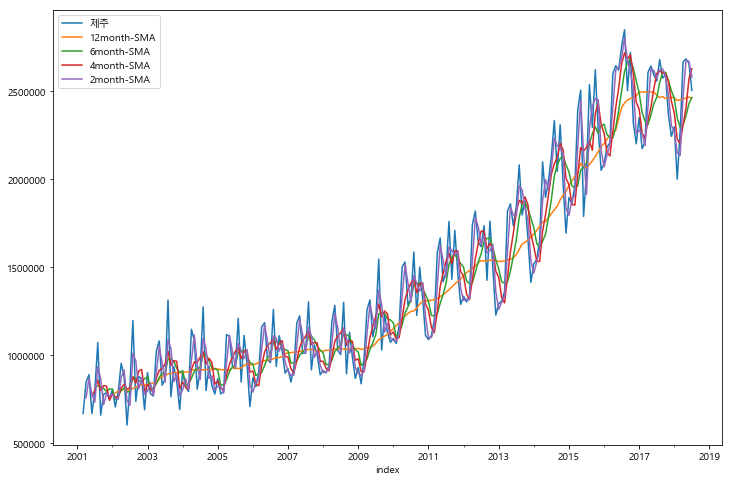

In [21]:
# 합쳐서 보기
airline.ix[:,[0,1,2,3,4]].plot(figsize=(12,8))

### Decomposition Method

In [22]:
result = seasonal_decompose(airline['제주'], model='multiplicative')

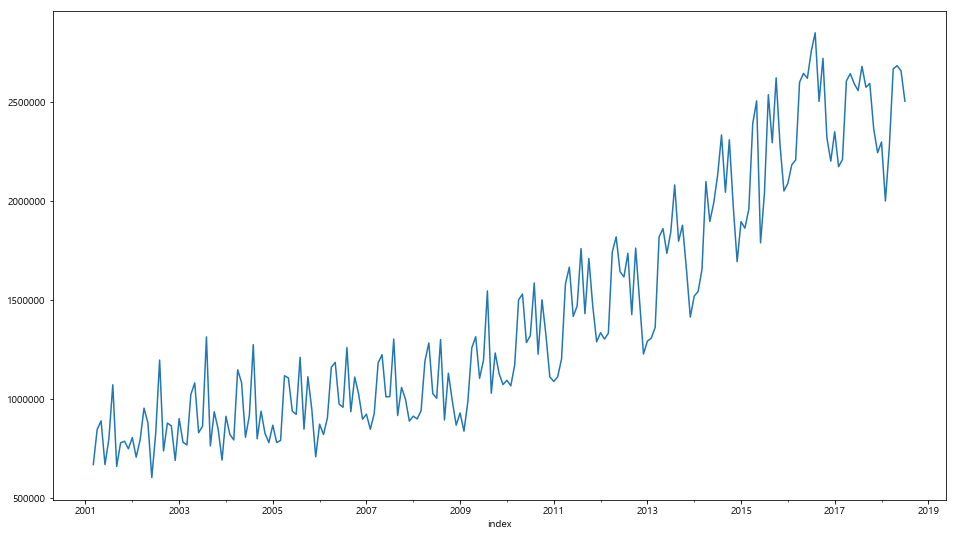

In [23]:
# 원래 데이터
result.observed.plot(figsize=(16 ,9))

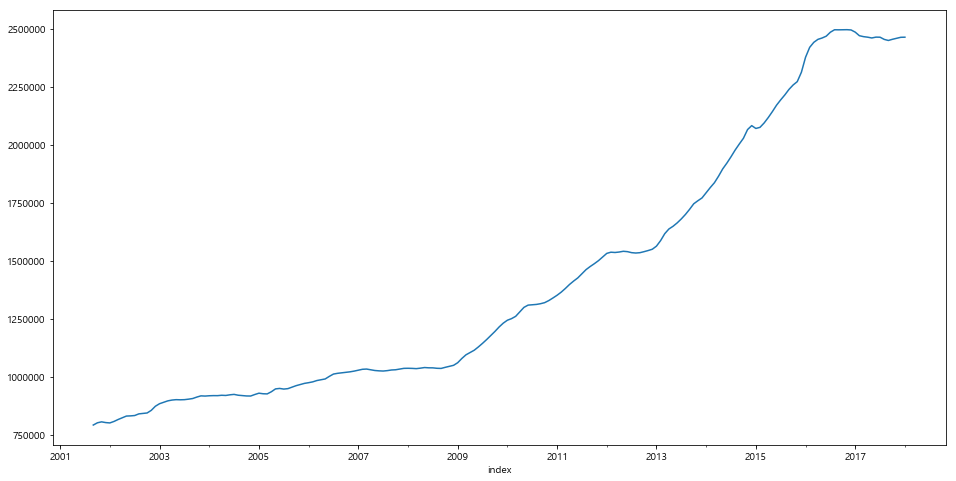

In [24]:
# 트렌드 요인(사실 트렌드와 사이클 요인과 같이 있는 상황 T X C)
result.trend.plot(figsize=(16,8))

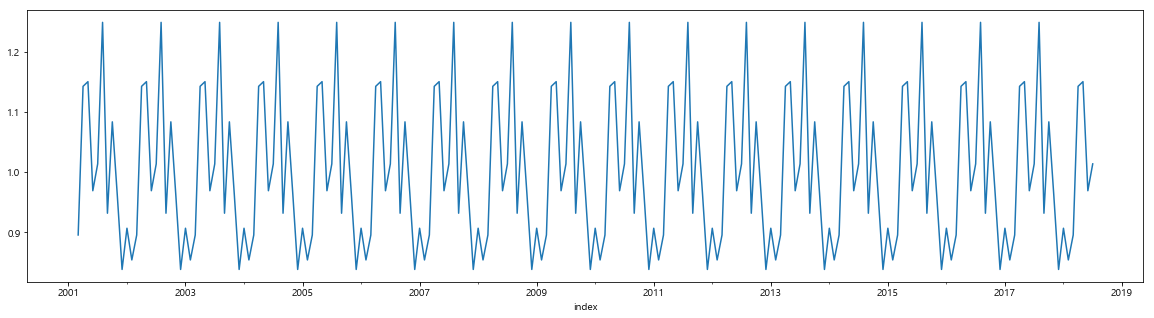

In [26]:
# 계절 요인
result.seasonal.plot(figsize=(20,5))

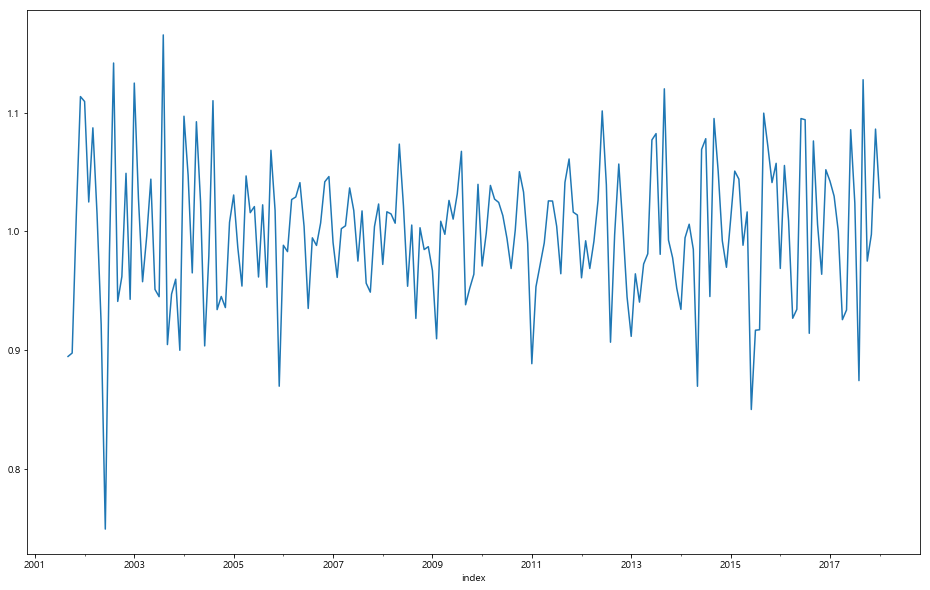

In [27]:
# 잔차(=랜덤 요인)
result.resid.plot(figsize=(16,10))

In [28]:
airline['trend'] = result.trend

In [29]:
airline['seasonal'] = result.seasonal

In [30]:
airline['random'] = result.resid

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


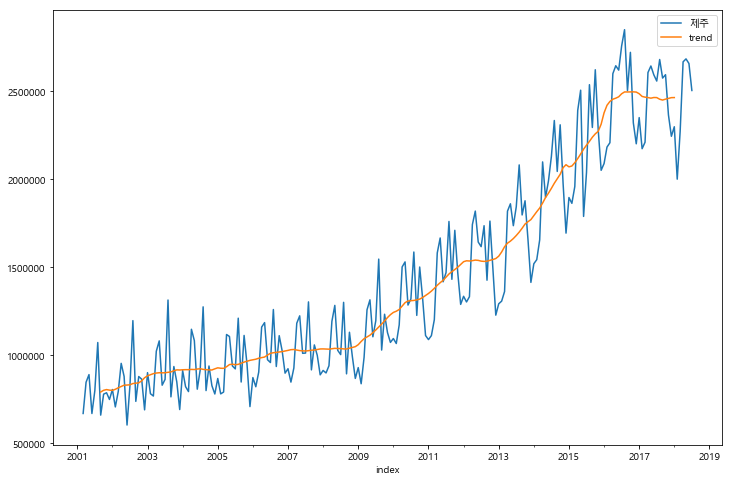

In [31]:
# 합쳐서 보기
airline.ix[:,[0,5]].plot(figsize=(12,8))

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


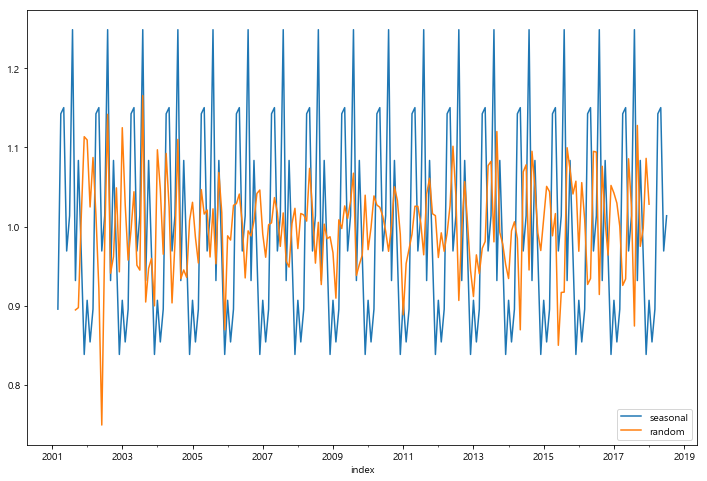

In [32]:
# 합쳐서 보기
airline.ix[:,[6,7]].plot(figsize=(12,8))

In [33]:
airline

,제주,12month-SMA,6month-SMA,4month-SMA,2month-SMA,trend,seasonal,random
index,,,,,,,,
2001-03-01,669146,NaN,NaN,NaN,NaN,NaN,0.895792,NaN
2001-04-01,846679,NaN,NaN,NaN,757912.5,NaN,1.142528,NaN
2001-05-01,890046,NaN,NaN,NaN,868362.5,NaN,1.150287,NaN
2001-06-01,668967,NaN,NaN,768709.50,779506.5,NaN,0.969246,NaN
2001-07-01,799255,NaN,NaN,801236.75,734111.0,NaN,1.013789,NaN
2001-08-01,1072459,NaN,8.244253e+05,857681.75,935857.0,NaN,1.248724,NaN
2001-09-01,659826,NaN,8.228720e+05,800126.75,866142.5,7.912787e+05,0.931912,0.894798
2001-10-01,779103,NaN,8.116093e+05,827660.75,719464.5,8.009530e+05,1.083586,0.897686
2001-11-01,786897,NaN,7.944178e+05,824571.25,783000.0,8.050115e+05,0.964191,1.013801
